In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
#Testing Comment for Source Control Testing

In [3]:
# Put dataset into a dataframe
df = pd.read_csv('NHL_Teams.csv')

In [4]:
df 

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1909,NHA,COB,BKN,NaN,NaN,4,NaN,12,4,...,104,Cobalt Silver Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,NHA,HAI,MTL,NaN,NaN,5,NaN,12,4,...,83,Haileybury Hockey Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,NHA,LES,TBS,NaN,NaN,7,NaN,12,2,...,100,Les Canadiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,NHA,MOS,MOS,NaN,NaN,6,NaN,12,3,...,95,Montreal Shamrocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,NHA,MOW,MTW,NaN,NaN,1,NaN,12,11,...,41,Montreal Wanderers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,2011,NHL,TBL,TBL,EC,SE,3,NaN,82,38,...,281,Tampa Bay Lightning,865.0,16.0,41.0,269.0,12.0,59.0,284.0,2.0
1515,2011,NHL,TOR,TOR,EC,NE,4,NaN,82,35,...,264,Toronto Maple Leafs,824.0,16.0,49.0,267.0,6.0,55.0,242.0,5.0
1516,2011,NHL,VAN,VAN,WC,NW,1,CQF,82,51,...,198,Vancouver Canucks,1049.0,10.0,57.0,288.0,4.0,40.0,286.0,7.0
1517,2011,NHL,WAS,WAS,EC,SE,2,CSF,82,42,...,230,Washington Capitals,767.0,16.0,41.0,245.0,10.0,49.0,266.0,3.0


In [5]:
df.columns

Index(['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank',
       'playoff', 'G', 'W', 'L', 'T', 'OTL', 'Pts', 'SoW', 'SoL', 'GF', 'GA',
       'name', 'PIM', 'BenchMinor', 'PPG', 'PPC', 'SHA', 'PKG', 'PKC', 'SHF'],
      dtype='object')

In [6]:
df = df.dropna(subset=['PPG', 'W'])

In [7]:
df

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
413,1963,NHL,BOS,BOS,NaN,NaN,6,NaN,70,18,...,212,Boston Bruins,858.0,NaN,28.0,220.0,4.0,45.0,242.0,3.0
414,1963,NHL,CHI,CHI,NaN,NaN,2,SF,70,36,...,169,Chicago Black Hawks,1116.0,NaN,51.0,279.0,2.0,43.0,301.0,8.0
415,1963,NHL,DET,DET,NaN,NaN,4,F,70,30,...,204,Detroit Red Wings,771.0,NaN,42.0,240.0,5.0,36.0,267.0,2.0
416,1963,NHL,MTL,MTL,NaN,NaN,1,SF,70,36,...,167,Montreal Canadiens,982.0,NaN,46.0,294.0,7.0,42.0,248.0,7.0
417,1963,NHL,NYR,NYR,NaN,NaN,5,NaN,70,22,...,242,New York Rangers,715.0,NaN,40.0,253.0,6.0,44.0,206.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,2011,NHL,TBL,TBL,EC,SE,3,NaN,82,38,...,281,Tampa Bay Lightning,865.0,16.0,41.0,269.0,12.0,59.0,284.0,2.0
1515,2011,NHL,TOR,TOR,EC,NE,4,NaN,82,35,...,264,Toronto Maple Leafs,824.0,16.0,49.0,267.0,6.0,55.0,242.0,5.0
1516,2011,NHL,VAN,VAN,WC,NW,1,CQF,82,51,...,198,Vancouver Canucks,1049.0,10.0,57.0,288.0,4.0,40.0,286.0,7.0
1517,2011,NHL,WAS,WAS,EC,SE,2,CSF,82,42,...,230,Washington Capitals,767.0,16.0,41.0,245.0,10.0,49.0,266.0,3.0


In [8]:
bruins_df = df[df['name'] == 'Boston Bruins']

In [9]:
bruins_df

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
413,1963,NHL,BOS,BOS,NaN,NaN,6,NaN,70,18,...,212,Boston Bruins,858.0,NaN,28.0,220.0,4.0,45.0,242.0,3.0
419,1964,NHL,BOS,BOS,NaN,NaN,6,NaN,70,21,...,253,Boston Bruins,946.0,NaN,25.0,254.0,10.0,52.0,293.0,10.0
425,1965,NHL,BOS,BOS,NaN,NaN,5,NaN,70,21,...,275,Boston Bruins,787.0,NaN,30.0,255.0,6.0,53.0,252.0,3.0
431,1966,NHL,BOS,BOS,NaN,NaN,6,NaN,70,17,...,253,Boston Bruins,764.0,NaN,34.0,250.0,9.0,53.0,240.0,4.0
437,1967,NHL,BOS,BOS,NaN,ED,3,QF,74,37,...,216,Boston Bruins,1031.0,NaN,45.0,236.0,4.0,50.0,288.0,10.0
449,1968,NHL,BOS,BOS,NaN,ED,2,SF,76,42,...,221,Boston Bruins,1291.0,NaN,60.0,266.0,4.0,54.0,351.0,13.0
461,1969,NHL,BOS,BOS,NaN,ED,2,SC,76,40,...,216,Boston Bruins,1196.0,12.0,81.0,279.0,4.0,80.0,360.0,13.0
473,1970,NHL,BOS,BOS,NaN,ED,1,QF,78,57,...,207,Boston Bruins,1156.0,8.0,80.0,289.0,4.0,53.0,336.0,25.0
487,1971,NHL,BOS,BOS,NaN,ED,1,SC,78,54,...,204,Boston Bruins,1112.0,6.0,74.0,256.0,2.0,51.0,290.0,18.0
502,1972,NHL,BOS,BOS,NaN,ED,2,QF,78,51,...,235,Boston Bruins,1097.0,4.0,67.0,241.0,5.0,43.0,275.0,15.0


In [10]:
goals_allowed = df['GA'].to_list()
# Convert list to a numpy array and reshape it
goals_allowed = np.array(goals_allowed).reshape(-1,1)

In [11]:
ppg = df['PPG'].to_list()
print(ppg[:3])
# Convert list to a numpy array and reshape it
ppg = np.array(ppg).reshape(-1,1)
print(ppg[:3])

[28.0, 51.0, 42.0]
[[28.]
 [51.]
 [42.]]


In [12]:
wins = df['W'].to_list()
print(wins[:3])
# convert to numpy array and reshape
wins = np.array(wins).reshape(-1, 1)
print(wins[:3])

[18, 36, 30]
[[18]
 [36]
 [30]]


Text(0.5, 1.0, 'Wins compared to PPG')

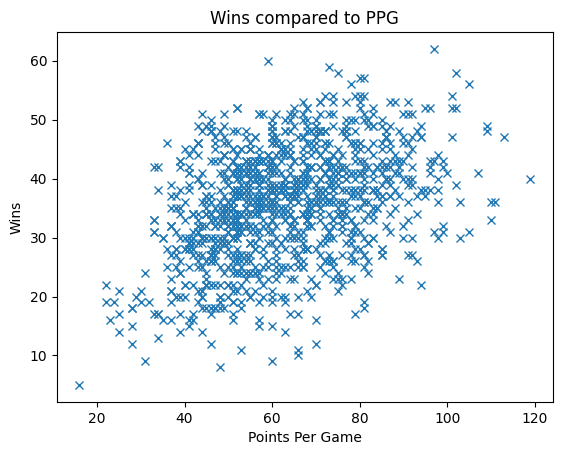

In [13]:
plt.plot(ppg, wins, 'x')
plt.xlabel('Points Per Game')
plt.ylabel('Wins')
plt.title('Wins compared to PPG')

# Using Scikit-Learn

1. Create a linear regression model and then fit the model with x and y data
2. Fit method gives the model variables to calculate the coeficient aka SLOPE and the intercept aka Y AXIS (y = mx + b) where m is the slope and B is the intercept

In [14]:
line_fitter = LinearRegression()
line_fitter.fit(ppg, wins)

LinearRegression()

In [15]:
ppg

array([[28.],
       [51.],
       [42.],
       ...,
       [57.],
       [41.],
       [45.]])

In [23]:
predicted_wins = line_fitter.predict(ppg)

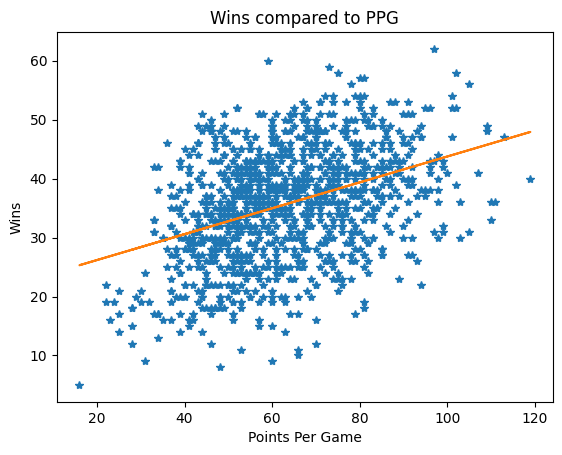

In [17]:
plt.plot(ppg, wins, '*')
plt.xlabel('Points Per Game')
plt.ylabel('Wins')
plt.title('Wins compared to PPG')
plt.plot(ppg, predicted_wins)

## Testing a different relationship
Wins vs Goals allowed, expecting an inverse graph

Note below that I had to created a new linearregression model for a new data relationship betweeen wins and goals allowed. additionally the new model was fit with the new x, y data. 

In [18]:
GA_fitted_line = LinearRegression()
GA_fitted_line.fit(goals_allowed, wins)

LinearRegression()

The predicted variable represents the y values on a graph that X (Goals allowed) would produce on the line of best fit

In [27]:
predicted_wins_GA = GA_fitted_line.predict(goals_allowed)

In [31]:
# Using Ridge Lineral Regression Model for fun
from sklearn import linear_model
GA_ridge_model = linear_model.Ridge(alpha=0.5)
GA_ridge_model.fit(goals_allowed, wins)
predicted_wins_GA_ridge = GA_ridge_model.predict(goals_allowed)

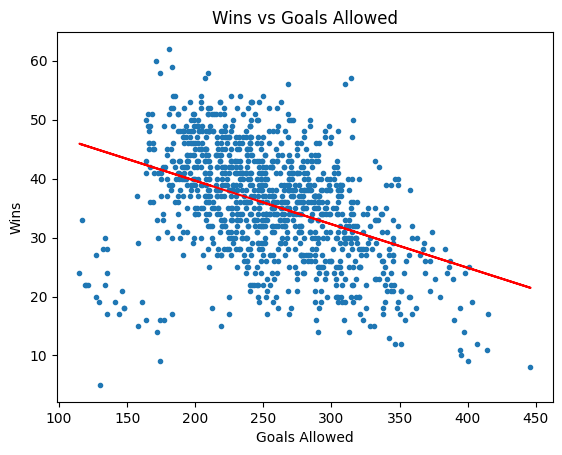

In [34]:
plt.title('Wins vs Goals Allowed')
plt.xlabel('Goals Allowed')
plt.ylabel('Wins')
plt.plot(goals_allowed, wins, '.')
plt.plot(goals_allowed, predicted_wins_GA, color='red')